In [ ]:
pip install preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import seaborn as sns; sns.set()
import graphviz 
import os
import preprocessing 
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud

from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Importing and Reading the Dataset
dataset = pd.read_csv("healthcare-dataset-stroke-data.csv")
dataset.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3353,49974,Male,49.00,0,0,Yes,Private,Rural,66.55,33.4,Unknown,0
2893,52164,Male,29.00,0,0,Yes,Private,Urban,193.81,46.8,never smoked,0
3777,47563,Female,17.00,0,0,No,Private,Rural,68.66,35.1,never smoked,0
3640,27608,Female,53.00,0,0,Yes,Govt_job,Urban,74.64,22.4,Unknown,0
1492,40251,Female,23.00,0,0,No,Private,Rural,65.90,21.5,never smoked,0
1652,51149,Male,70.00,0,0,Yes,Private,Urban,66.85,29.3,Unknown,0
3319,53924,Female,1.08,0,0,No,children,Urban,159.39,12.8,Unknown,0
732,31308,Female,49.00,0,0,Yes,Private,Urban,114.50,35.9,formerly smoked,0
4027,58577,Female,38.00,0,0,Yes,Govt_job,Rural,64.27,27.3,never smoked,0
2888,30627,Female,56.00,0,0,Yes,Govt_job,Urban,89.53,23.1,Unknown,0


Dropping column 'id' as it can cause unwanted correlation.

In [ ]:
dataset.drop("id", axis=1, inplace=True)

In [ ]:
dataset.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4282,Female,52.0,0,0,Yes,Private,Urban,81.32,27.6,formerly smoked,0
2337,Female,21.0,0,0,No,Private,Rural,59.52,33.7,never smoked,0
1553,Male,66.0,0,0,Yes,Govt_job,Rural,218.54,38.9,smokes,0
3254,Female,65.0,0,0,Yes,Govt_job,Urban,82.72,29.8,smokes,0
4848,Female,7.0,0,0,No,children,Urban,128.17,18.9,Unknown,0


Variable Description

id: unique identifier
gender: "Male", "Female" or "Other"

age: age of the patient

hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

ever_married: "No" or "Yes"

work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

Residence_type: "Rural" or "Urban"

avg_glucose_level: average glucose level in blood

bmi: body mass index

smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

stroke: 1 if the patient had a stroke or 0 if not

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Univariate Variable Analysis
Categorical Variables: 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'

Numerical Variables: 'id', 'hypertension', 'heart_disease', 'str

In [ ]:
def bar_plot(variable):
    # get feature
    var = dataset[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

In [ ]:
categorical = (dataset.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

Categorical variables:
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


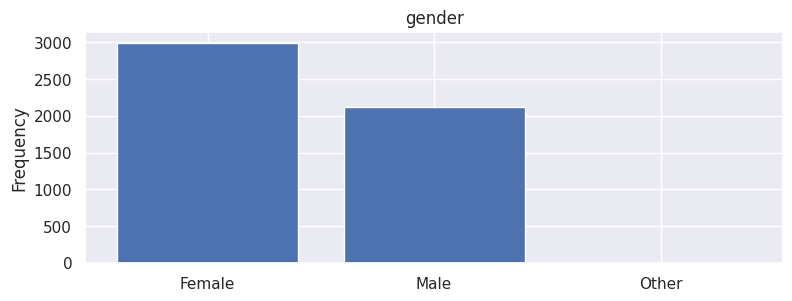

gender:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


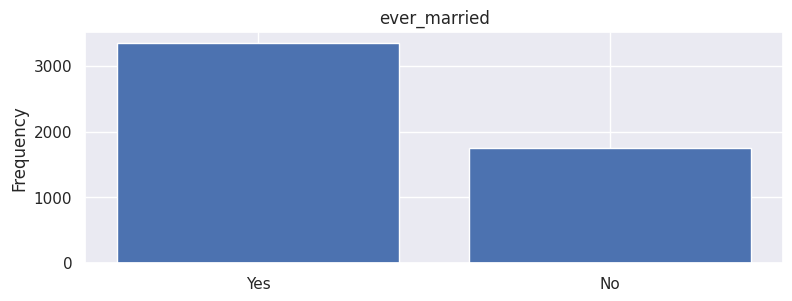

ever_married:
Yes    3353
No     1757
Name: ever_married, dtype: int64


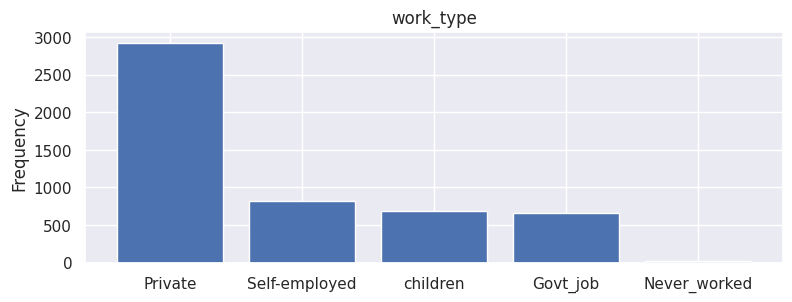

work_type:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


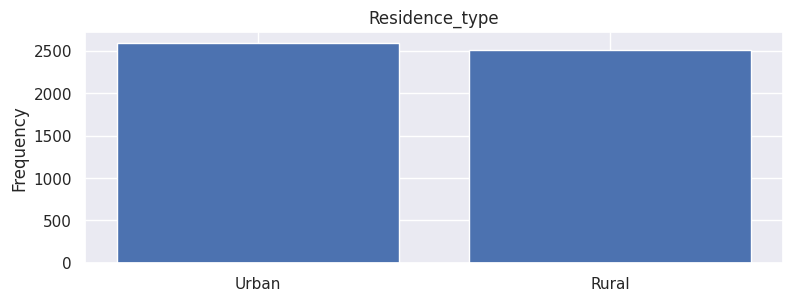

Residence_type:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


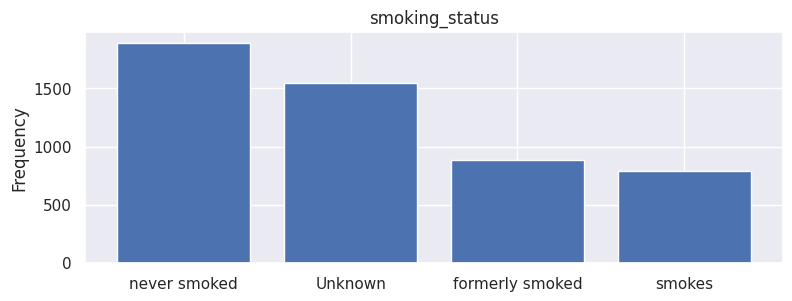

smoking_status:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [ ]:
sns.set_style('darkgrid')
categorical_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for c in categorical_variables:
    bar_plot(c)

<Axes: xlabel='ever_married', ylabel='stroke'>

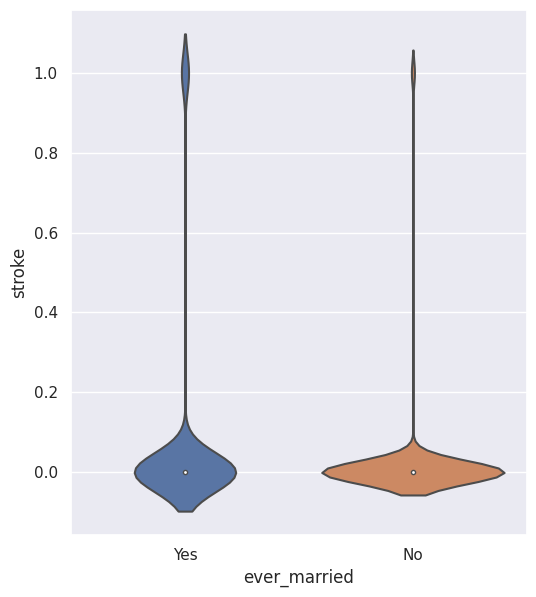

In [ ]:
plt.figure(figsize=(20,15))
sns.set_theme(style="darkgrid")
plt.subplot(2,3,1)
sns.violinplot(x = 'ever_married', y = 'stroke', data = dataset)

Numerical Variables

In [ ]:
numerical_int64 = (dataset.dtypes == "int64")
numerical_int64_list = list(numerical_int64[numerical_int64].index)

print("Categorical variables:")
print(numerical_int64_list)

Categorical variables:
['hypertension', 'heart_disease', 'stroke']


In [ ]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(dataset[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

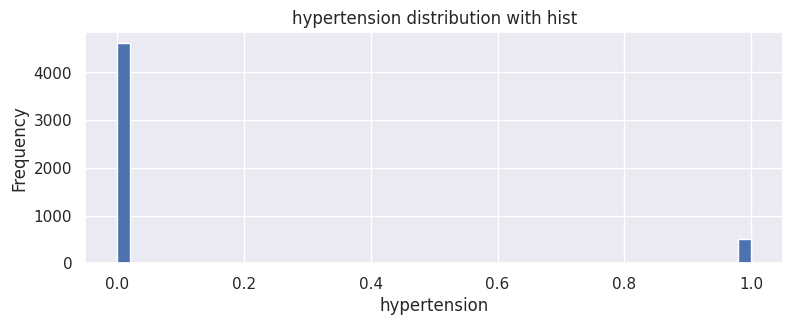

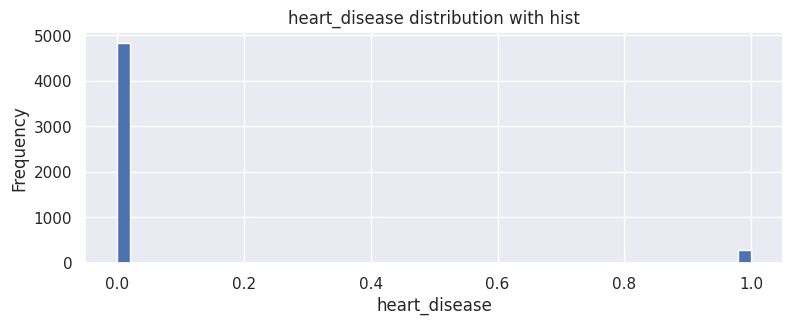

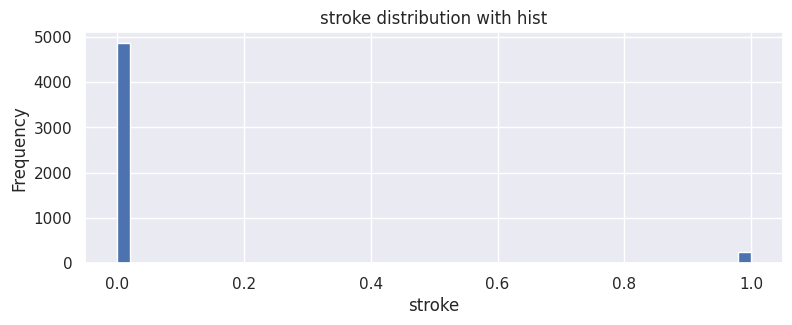

In [ ]:
numerical_variables = ['hypertension', 'heart_disease', 'stroke']
for n in numerical_variables:
    plot_hist(n)

In [ ]:
numerical_float64 = (dataset.dtypes == "float64")
numerical_float64_list = list(numerical_float64[numerical_float64].index)

print("Numerical variables:")
print(numerical_float64_list)

Numerical variables:
['age', 'avg_glucose_level', 'bmi']


In [ ]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(dataset[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()

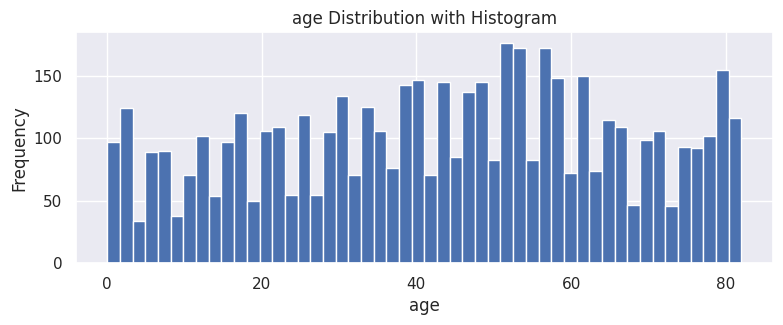

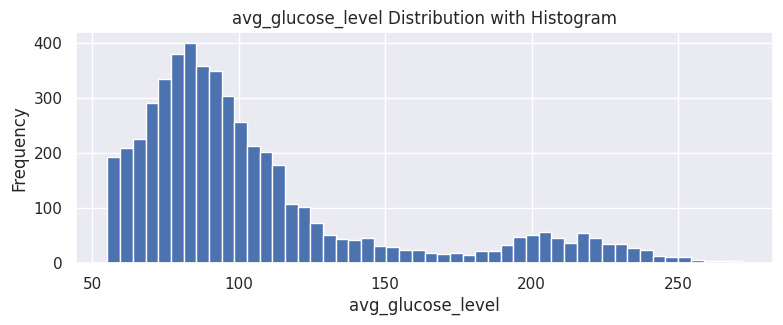

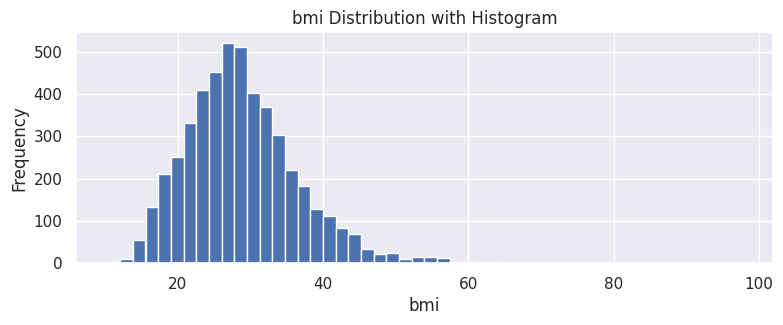

In [ ]:
numerical_variables = ['age', 'avg_glucose_level', 'bmi']
for n in numerical_variables:
    plot_hist(n)

Text(0.5, 1.0, 'avg_glucose_level Interval and Counts')

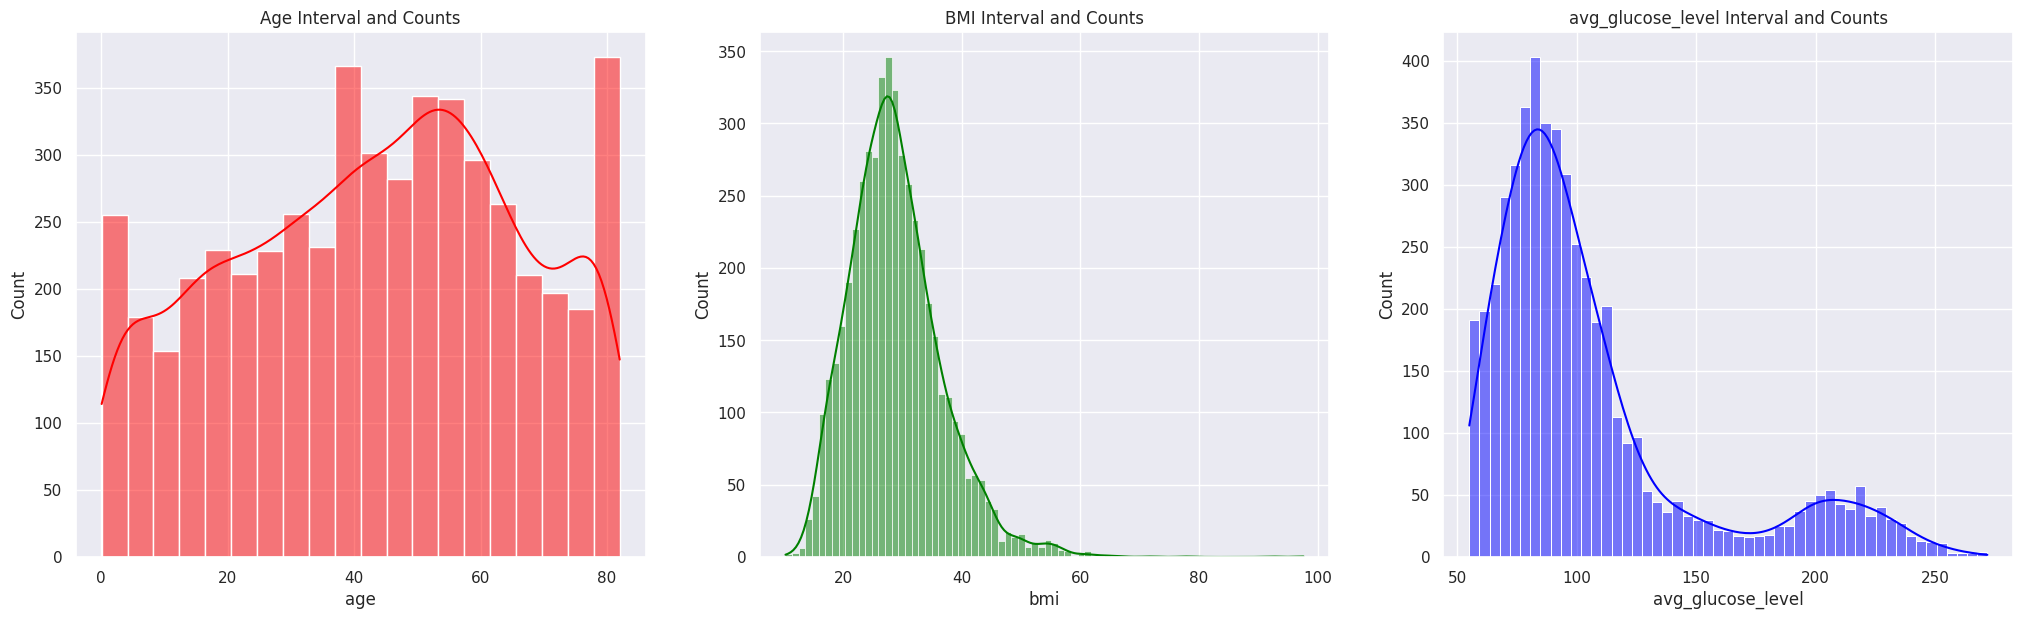

In [ ]:
plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
sns.histplot(dataset['age'], color = 'red', kde = True).set_title('Age Interval and Counts')

plt.subplot(2,3,2)
sns.histplot(dataset['bmi'], color = 'green', kde = True).set_title('BMI Interval and Counts')

plt.subplot(2,3,3)
sns.histplot(dataset['avg_glucose_level'], kde = True, color = 'blue').set_title('avg_glucose_level Interval and Counts')

Text(0.5, 1.0, 'Stroke Interval and Counts')

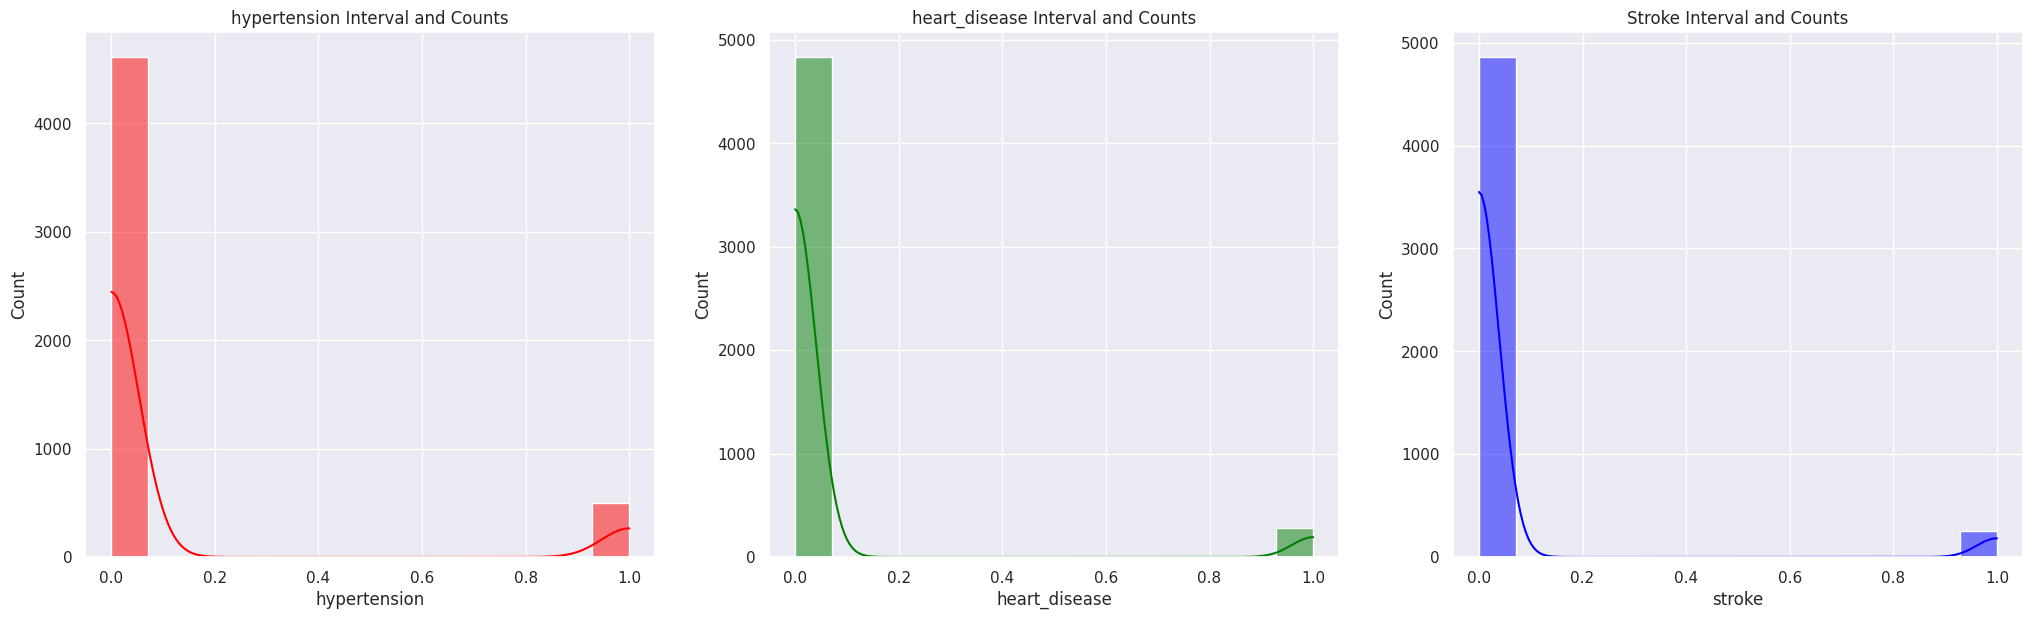

In [ ]:
plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
sns.histplot(dataset['hypertension'], color = 'red', kde = True).set_title('hypertension Interval and Counts')

plt.subplot(2,3,2)
sns.histplot(dataset['heart_disease'], color = 'green', kde = True).set_title('heart_disease Interval and Counts')

plt.subplot(2,3,3)
sns.histplot(dataset['stroke'], kde = True, color = 'blue').set_title('Stroke Interval and Counts')

<Axes: xlabel='stroke', ylabel='avg_glucose_level'>

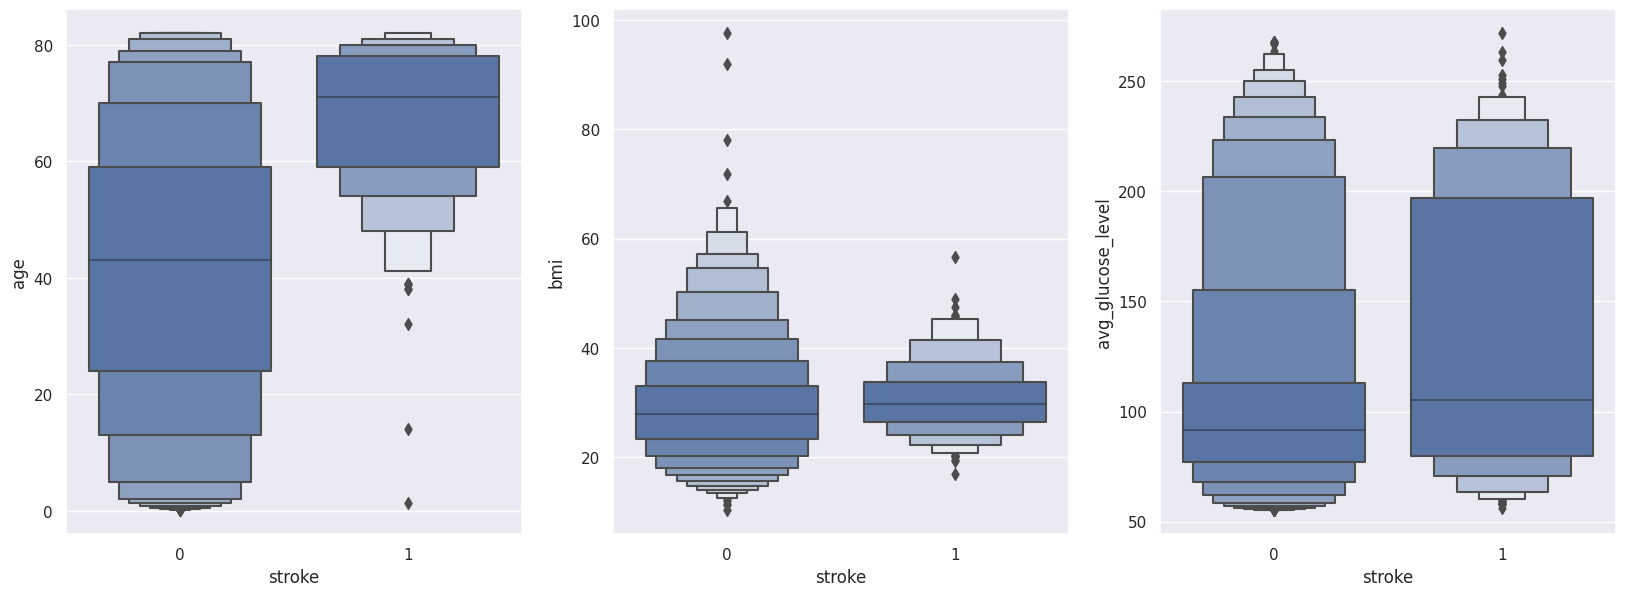

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")


plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxenplot(x=dataset['stroke'], y=dataset['age'],
              color="b", 
              scale="linear", data=dataset)

plt.subplot(2,3,2)
sns.boxenplot(x=dataset['stroke'], y=dataset['bmi'],
              color="b", 
              scale="linear", data=dataset)

plt.subplot(2,3,3)
sns.boxenplot(x=dataset['stroke'], y=dataset['avg_glucose_level'],
              color="b", 
              scale="linear", data=dataset)

2. Basic Data Analysis

Average stroke rate by gender. Male's stroke rate is higher.

In [ ]:
dataset[["gender","stroke"]].groupby(["gender"], as_index = False).mean().sort_values(by="stroke",ascending = False)

,gender,stroke
1,Male,0.051064
0,Female,0.047094
2,Other,0.000000


Ever Married - Stroke

stroke rate based on married or not

In [ ]:
dataset[["ever_married","stroke"]].groupby(["ever_married"], as_index = False).mean().sort_values(by="stroke",ascending = False)

,ever_married,stroke
1,Yes,0.065613
0,No,0.016505


Text(0.5, 1.0, "Distribution of Samples by 'ever_married'")

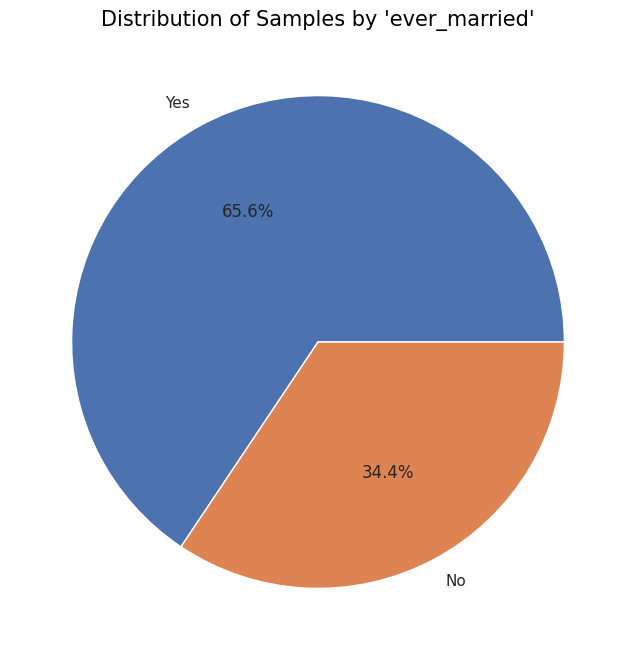

In [ ]:
labels = dataset['ever_married'].value_counts().index
sizes = dataset['ever_married'].value_counts().values

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of Samples by 'ever_married'",color = 'black',fontsize = 15)

Work Type - Stroke

stroke rate based on work_type

In [ ]:
dataset[["work_type","stroke"]].groupby(["work_type"], as_index = False).mean().sort_values(by="stroke",ascending = False)

,work_type,stroke
3,Self-employed,0.079365
2,Private,0.050940
0,Govt_job,0.050228
4,children,0.002911
1,Never_worked,0.000000


In [ ]:
dataset[["work_type","stroke"]].groupby(["work_type"], as_index = False).count().sort_values(by="stroke",ascending = False)

,work_type,stroke
2,Private,2925
3,Self-employed,819
4,children,687
0,Govt_job,657
1,Never_worked,22


In [ ]:
df = dataset

labels = dataset['work_type'].value_counts().index
pie1 = dataset['work_type'].value_counts().values
# figure
fig = {
  "data": [
    {
      "values": pie1,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "",
      "hoverinfo":"label+percent+name+value",
      "hole": .2,
      "type": "pie",
    },],
  "layout": {
        "title":"Distribution of Work Type",
        "annotations": [
            { "font": { "size": 25},
              "showarrow": True,
              "text": "Work Type",
                "x": 1,
                "y": 1,
             
            },
        ]
    }
}
iplot(fig)

# plt.figure(figsize = (8,8))
# plt.pie(pie1, labels=labels, autopct='%1.1f%%')
# plt.title("Distribution of Work Types",color = 'black',fontsize = 15)

Residence_type - Stroke

stroke rate based on residence type.

In [ ]:
dataset[["Residence_type","stroke"]].groupby(["Residence_type"], as_index = False).mean().sort_values(by="stroke",ascending = False)

,Residence_type,stroke
1,Urban,0.052003
0,Rural,0.045346


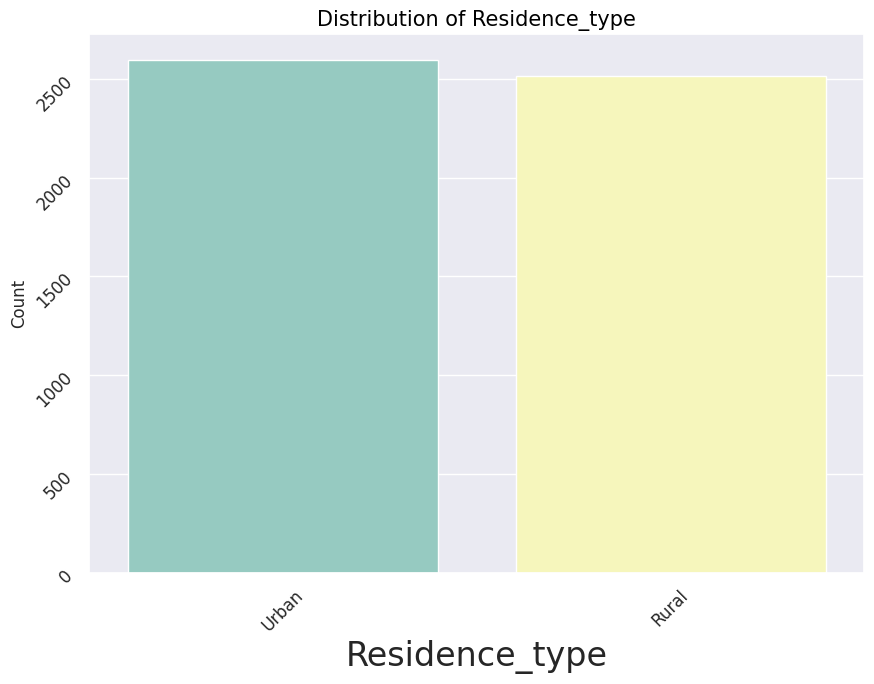

In [ ]:
counts = dataset['Residence_type'].value_counts()

plt.figure(figsize=(10,7))
sns.barplot(x=counts.index, y=counts.values, palette="Set3")

plt.ylabel('Count')
plt.xlabel('Residence_type', style = 'normal', size = 24)

plt.xticks(rotation = 45, size = 12)
plt.yticks(rotation = 45, size = 12)

plt.title('Distribution of Residence_type',color = 'black',fontsize=15)
plt.show()

smoking_status - Stroke

In [ ]:
dataset[["smoking_status","stroke"]].groupby(["smoking_status"], as_index = False).mean().sort_values(by="stroke",ascending = False)

,smoking_status,stroke
1,formerly smoked,0.079096
3,smokes,0.053232
2,never smoked,0.047569
0,Unknown,0.030440


3. Pandas Profiling

Pandas profiling is a useful library that generates interactive reports about the data. With using this library, we can see types of data, distribution of data and various statistical information. This tool has many features for data preparing. Pandas Profiling includes graphics about specific feature and correlation maps too. You can see more details about this tool in the following url: https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/

In [ ]:
import pandas_profiling as pp
pp.ProfileReport(dataset)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

4. Correlation
Correlation explains how one or more variables are related to each other. These variables can be input data features which have been used to forecast our target variable.
https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

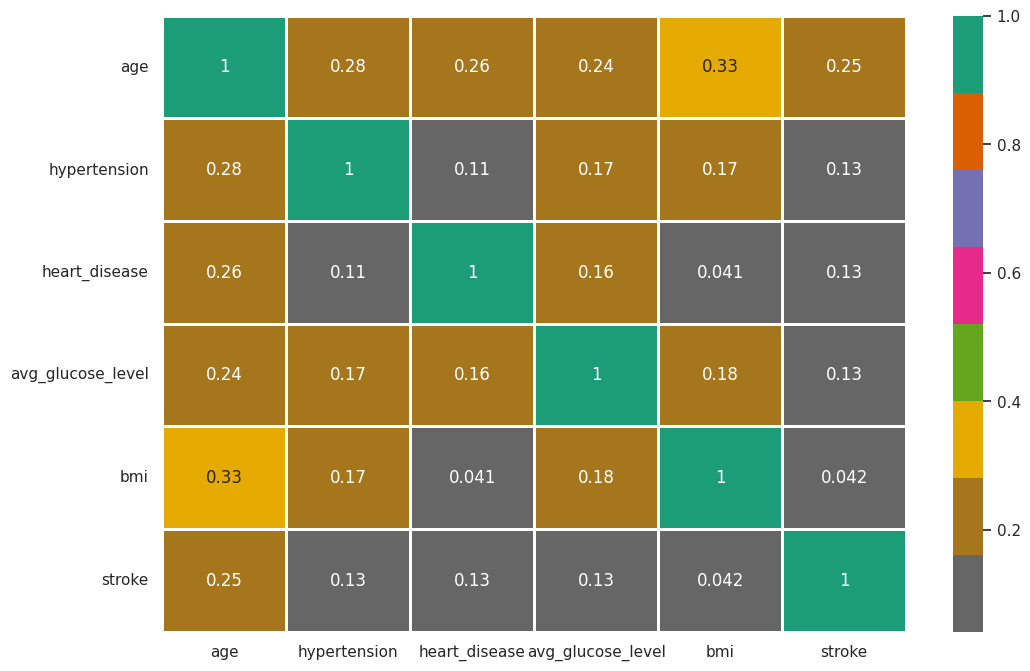

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(dataset.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

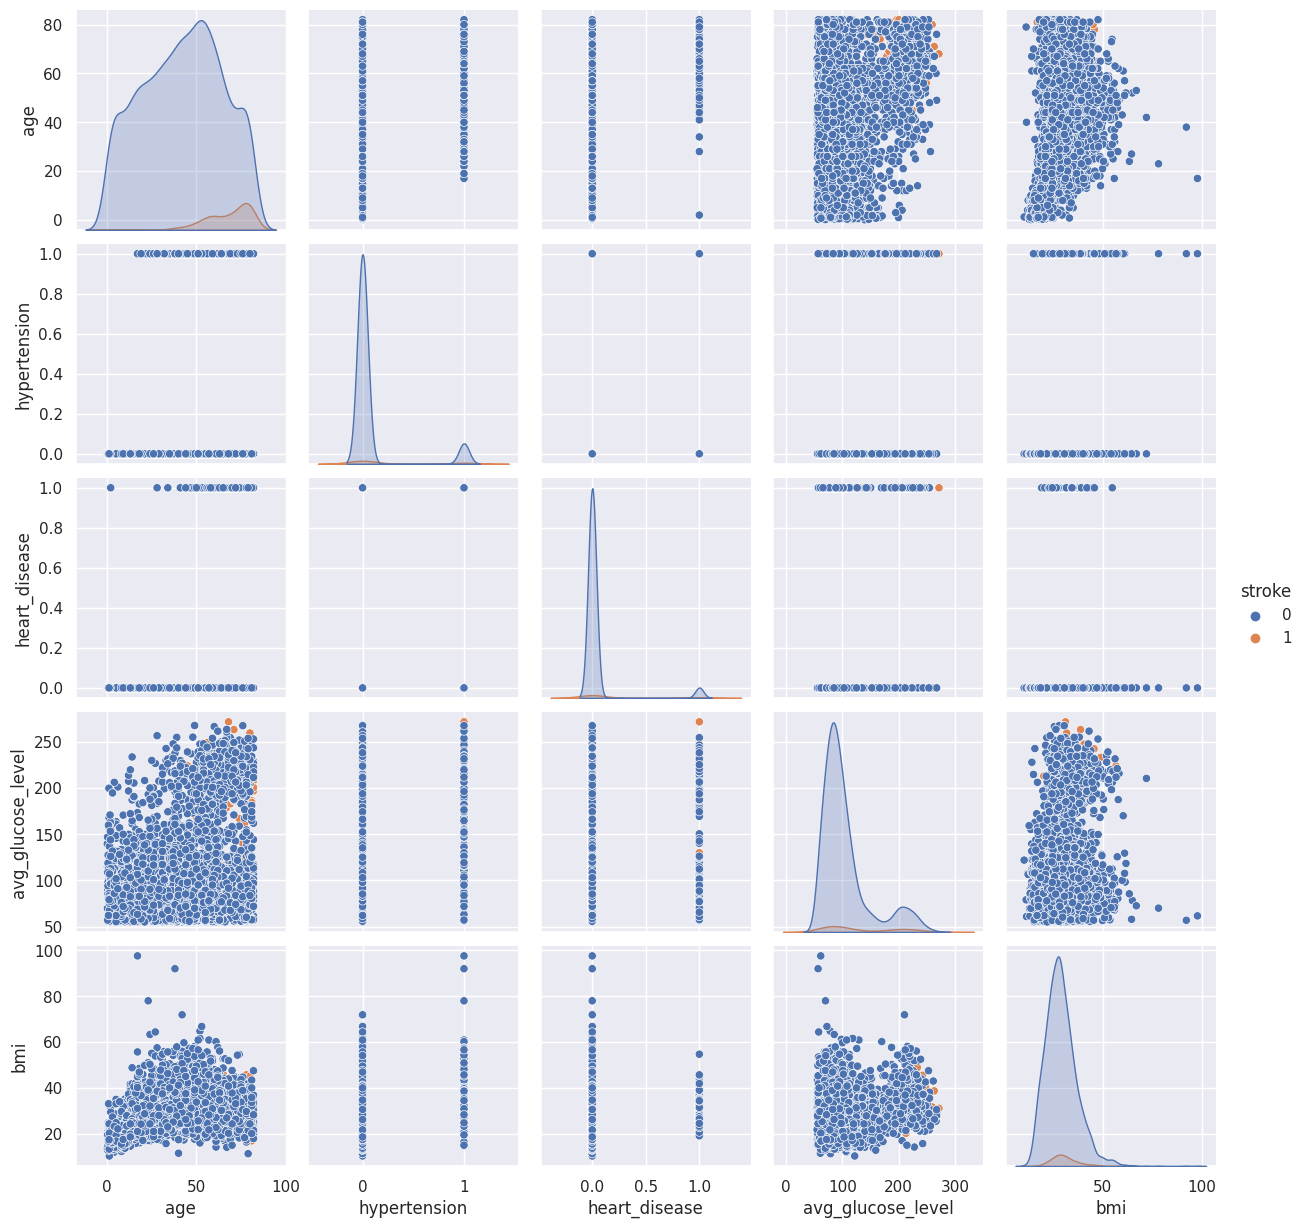

In [ ]:
sns.pairplot(dataset, hue = 'stroke')

5. Anomaly Detection

Anomaly is one that differs / deviates significantly from other observations in the same sample. An anomaly detection pattern produces two different results. The first is a categorical tag for whether the observation is abnormal or not; the second is a score or trust value. Score carries more information than the label. Because it also tells us how abnormal the observation is. The tag just tells you if it's abnormal. While labeling is more common in supervised methods, the score is more common in unsupervised and semisupervised methods.

In [ ]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [ ]:
import numpy as np

In [ ]:
dataset.loc[detect_outliers(dataset,['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke'])]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
14,Female,79.0,0,1,Yes,Private,Urban,214.09,28.2,never smoked,1
16,Male,64.0,0,1,Yes,Private,Urban,191.61,37.5,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
35,Female,82.0,1,1,No,Private,Rural,84.03,26.5,formerly smoked,1
143,Female,69.0,1,1,No,Self-employed,Urban,72.17,36.8,never smoked,1
171,Female,79.0,1,1,No,Self-employed,Rural,60.94,NaN,never smoked,1


# drop outliers

In [ ]:
dataset = dataset.drop(detect_outliers(dataset,['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']),axis = 0).reset_index(drop = True)

In [ ]:
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
4,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5030,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5031,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5032,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5033,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


6. Missing Values

We have 201 null values in total. bmi includes all. (After Anomaly Detection, it decreases to 192)

bmi

In [ ]:
dataset[dataset['bmi'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
5,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
17,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
18,Male,59.0,0,0,Yes,Private,Rural,211.78,NaN,formerly smoked,1
28,Female,63.0,0,0,Yes,Private,Urban,90.90,NaN,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4964,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
4973,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5018,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5024,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


*How can we handle null values?*

We have selected the differences for BMI will be between gender.

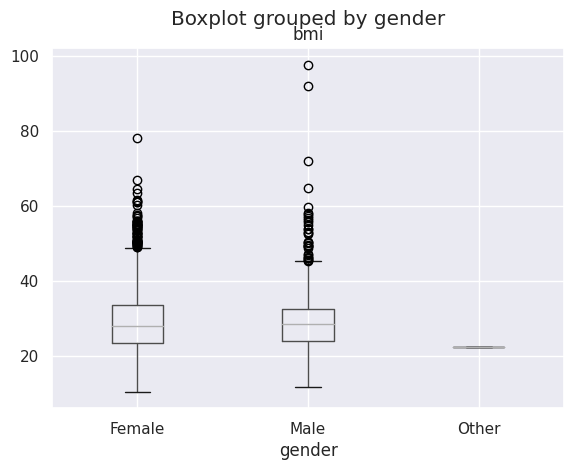

In [ ]:
dataset.boxplot(column="bmi",by = "gender")
plt.show()

We get different BMI averages for women and men, although not very large. I will assign the total BMI mean as there are very few examples for the Others gender.

In [ ]:
print("Mean of BMI value for Females: ", np.mean(dataset[dataset['gender'] == 'Female']['bmi']))
print("Mean of BMI value for Males: ", np.mean(dataset[dataset['gender'] == 'Male']['bmi']))
print("Mean of BMI value for Others: ", np.mean(dataset['bmi']))

Mean of BMI value for Females:  29.035926055109872
Mean of BMI value for Males:  28.5946835443038
Mean of BMI value for Others:  28.854614908114808


I filled null values with 0.

In [ ]:
dataset['bmi'] = dataset['bmi'].fillna(0)

In [ ]:
for i in range(0,5035):
    if(dataset['bmi'][i] == 0):
        if(dataset['gender'][i] == 'Male'):
            dataset['bmi'][i] = 28.594683544303823
        elif(dataset['gender'][i] == 'Female'):
            dataset['bmi'][i] = 29.035926055109936
        else:
            dataset['bmi'][i] = 28.854652338161664

In [ ]:
#testing null values in any attributes now
dataset[dataset['bmi'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


7. Encoding

First, we will handle Categorical Values.

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
print("Unique Values for Gender", dataset['gender'].unique())
print("Unique Values for ever_married", dataset['ever_married'].unique())
print("Unique Values for work_type", dataset['work_type'].unique())
print("Unique Values for Residence_type", dataset['Residence_type'].unique())
print("Unique Values for smoking_status", dataset['smoking_status'].unique())

Unique Values for Gender ['Female' 'Male' 'Other']
Unique Values for ever_married ['Yes' 'No']
Unique Values for work_type ['Self-employed' 'Private' 'Govt_job' 'children' 'Never_worked']
Unique Values for Residence_type ['Rural' 'Urban']
Unique Values for smoking_status ['never smoked' 'smokes' 'formerly smoked' 'Unknown']


Label Encoding

Label Encoding is an encoding technique for handling categorical variables. In this technique, each data is assigned a unique integer.

In [ ]:
ever_married_mapping = {'No': 0, 'Yes': 1}
dataset['ever_married'] = dataset['ever_married'].map(ever_married_mapping)

In [ ]:
Residence_type_mapping = {'Rural': 0, 'Urban': 1}
dataset['Residence_type'] = dataset['Residence_type'].map(Residence_type_mapping)

One-Hot Encoding

One Hot Encoding is the binary representation of categorical variables. This process requires categorical values to be mapped to integer values first. Next, each integer value is represented as a binary vector with all values zero except the integer index marked with 1.

One Hot Encoding makes the representation of categorical data more expressive and easy. Many machine learning algorithms cannot work directly with categorical data, so categories must be converted to numbers. This operation is required for input and output variables that are categorical.

In this part, we converted categorical datas to the binary values. This operation increases the accuracy.

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
onehotencoder = OneHotEncoder()

In [ ]:
dataset['gender'] = pd.Categorical(dataset['gender'])
datasetDummies_gender = pd.get_dummies(dataset['gender'], prefix = 'gender_encoded')
datasetDummies_gender

,gender_encoded_Female,gender_encoded_Male,gender_encoded_Other
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
5030,1,0,0
5031,1,0,0
5032,1,0,0
5033,0,1,0


In [ ]:
dataset['work_type'] = pd.Categorical(dataset['work_type'])
datasetDummies_work_type = pd.get_dummies(dataset['work_type'], prefix = 'work_type_encoded')
datasetDummies_work_type

,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children
0,0,0,0,1,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
5030,0,0,1,0,0
5031,0,0,0,1,0
5032,0,0,0,1,0
5033,0,0,1,0,0


In [ ]:
dataset['smoking_status'] = pd.Categorical(dataset['smoking_status'])
datasetDummies_smoking_status = pd.get_dummies(dataset['smoking_status'], prefix = 'smoking_status_encoded')
datasetDummies_smoking_status

,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
5030,0,0,1,0
5031,0,0,1,0
5032,0,0,1,0
5033,0,1,0,0


In [ ]:
dataset.drop("gender", axis=1, inplace=True)
dataset.drop("work_type", axis=1, inplace=True)
dataset.drop("smoking_status", axis=1, inplace=True)

In [ ]:
dataset = pd.concat([dataset, datasetDummies_gender], axis=1)
dataset = pd.concat([dataset, datasetDummies_work_type], axis=1)
dataset = pd.concat([dataset, datasetDummies_smoking_status], axis=1)
dataset

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_encoded_Female,gender_encoded_Male,gender_encoded_Other,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes
0,61.0,0,0,1,0,202.21,29.035926,1,1,0,0,0,0,0,1,0,0,0,1,0
1,80.0,0,1,1,0,105.92,32.500000,1,0,1,0,0,0,1,0,0,0,0,1,0
2,49.0,0,0,1,1,171.23,34.400000,1,1,0,0,0,0,1,0,0,0,0,0,1
3,81.0,0,0,1,1,186.21,29.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
4,69.0,0,0,0,1,94.39,22.800000,1,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,80.0,1,0,1,1,83.75,29.035926,0,1,0,0,0,0,1,0,0,0,0,1,0
5031,81.0,0,0,1,1,125.20,40.000000,0,1,0,0,0,0,0,1,0,0,0,1,0
5032,35.0,0,0,1,0,82.99,30.600000,0,1,0,0,0,0,0,1,0,0,0,1,0
5033,51.0,0,0,1,0,166.29,25.600000,0,0,1,0,0,0,1,0,0,0,1,0,0


Now, we don't have categorical variables. Dataset is ready for Machine Leraning algorithms.

8. Train - Test Split

In [ ]:
features = ['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'gender_encoded_Female',
 'gender_encoded_Male',
 'gender_encoded_Other',
 'work_type_encoded_Govt_job',
 'work_type_encoded_Never_worked',
 'work_type_encoded_Private',
 'work_type_encoded_Self-employed',
 'work_type_encoded_children',
 'smoking_status_encoded_Unknown',
 'smoking_status_encoded_formerly smoked',
 'smoking_status_encoded_never smoked',
 'smoking_status_encoded_smokes']

label = ['stroke']

X = dataset[features]
y = dataset[label]

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.preprocessing import normalize

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve

from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3) 
# X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
# print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')


Total # of sample in whole dataset: 5035
Total # of sample in train dataset: 4028
Total # of sample in test dataset: 1007


Standardization is a method in which the mean value is 0 and the standard deviation is 1, and the distribution approaches the normal. The formula is as follows, we subtract the average value from the value we have, then divide it by the variance value.

In [ ]:
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Saving the scaler object

9. Training & Scores of Models

These are the ML algorithms that will apply to dataset. Results will contain train-validation-test scores, confusion matrix, statistical information and classification reports for each algorithm.

In [ ]:
models = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SupportVectorMachine': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
    'Neural Nets': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1),
}

modelNames = ["GaussianNB", 'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']

trainScores = []
validationScores = []
testScores = []

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
#   score = model.score(X_valid, y_valid)
  #print(f'{m} validation score => {score*100}') #not needed
    
  print(f'{m}') 
  train_score = model.score(X_train, y_train)
  print(f'Train score of trained model: {train_score*100}')
  trainScores.append(train_score*100)

#   validation_score = model.score(X_valid, y_valid)
#   print(f'Validation score of trained model: {validation_score*100}')
#   validationScores.append(validation_score*100)

  test_score = model.score(X_test, y_test)
  print(f'Test score of trained model: {test_score*100}')
  testScores.append(test_score*100)
  print(" ")
    
  y_predictions = model.predict(X_test)
  conf_matrix = confusion_matrix(y_predictions, y_test)

  print(f'Confussion Matrix: \n{conf_matrix}\n')

  predictions = model.predict(X_test)
  cm = confusion_matrix(predictions, y_test)

  tn = conf_matrix[0,0]
  fp = conf_matrix[0,1]
  tp = conf_matrix[1,1]
  fn = conf_matrix[1,0]
  accuracy  = (tp + tn) / (tp + fp + tn + fn)
  precision = tp / (tp + fp)
  recall    = tp / (tp + fn)
  f1score  = 2 * precision * recall / (precision + recall)
  specificity = tn / (tn + fp)
  print(f'Accuracy : {accuracy}')
#   print(f'Precision: {precision}')
#   print(f'Recall   : {recall}')
#   print(f'F1 score : {f1score}')
  print(f'Specificity : {specificity}')
  print("") 
  print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
  print("")

  for m in range (1):
    current = modelNames[m]
    modelNames.remove(modelNames[m])

  preds = model.predict(X_test) 
  confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true' 
#   print(preds) # this list contains 831 values test values predictions by the model
#   print(confusion_matr) #confusion matrix for the test set by that particular model
  print("*********************************************************************************************")
  print("")
  print("")

GaussianNB
Train score of trained model: 18.123138033763656
Test score of trained model: 17.477656405163852
 
Confussion Matrix: 
[[145   0]
 [831  31]]

Accuracy : 0.17477656405163852
Specificity : 1.0

Classification Report: 
              precision    recall  f1-score   support

           0       0.15      1.00      0.26       145
           1       1.00      0.04      0.07       862

    accuracy                           0.17      1007
   macro avg       0.57      0.52      0.16      1007
weighted avg       0.88      0.17      0.10      1007



*********************************************************************************************


BernoulliNB
Train score of trained model: 95.40714995034757
Test score of trained model: 95.72989076464746
 
Confussion Matrix: 
[[964  31]
 [ 12   0]]

Accuracy : 0.9572989076464746
Specificity : 0.9688442211055276

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       9

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

models = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SupportVectorMachine': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
    'Neural Network': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1),
}

modelNames = ["GaussianNB", 'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',             'Stochastic Gradient Descent', 'Neural Network']

results = pd.DataFrame(columns=['Model', 'Train Score', 'Test Score', 'Accuracy', 'Specificity', 'Classification Report'])

for m in models:
    model = models[m]
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    y_predictions = model.predict(X_test)
    conf_matrix = confusion_matrix(y_predictions, y_test)
    tn = conf_matrix[0,0]
    fp = conf_matrix[0,1]
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    accuracy  = (tp + tn) / (tp + fp + tn + fn)*100
    specificity = tn / (tn + fp)*100
    report = classification_report(y_test, y_predictions, output_dict=True)
    results = results.append({
        'Model': m,
        'Train Score': train_score,
        'Test Score': test_score,
        'Accuracy': accuracy,
        'Specificity': specificity,
        'Classification Report': report,
    }, ignore_index=True)

results.set_index('Model', inplace=True)


In [ ]:
results 

,Train Score,Test Score,Accuracy,Specificity,Classification Report
Model,,,,,
GaussianNB,0.181231,0.174777,17.477656,100.000000,"{'0': {'precision': 1.0, 'recall': 0.148565573..."
BernoulliNB,0.954071,0.957299,95.729891,96.884422,"{'0': {'precision': 0.9688442211055276, 'recal..."
LogisticRegression,0.958788,0.969215,96.921549,96.921549,"{'0': {'precision': 0.9692154915590864, 'recal..."
RandomForestClassifier,0.999752,0.967229,96.722939,96.915423,"{'0': {'precision': 0.9691542288557214, 'recal..."
SupportVectorMachine,0.958788,0.969215,96.921549,96.921549,"{'0': {'precision': 0.9692154915590864, 'recal..."
DecisionTreeClassifier,1.000000,0.921549,92.154916,97.460317,"{'0': {'precision': 0.9746031746031746, 'recal..."
KNeighborsClassifier,0.959533,0.969215,96.921549,96.921549,"{'0': {'precision': 0.9692154915590864, 'recal..."
GradientBoostingClassifier,0.963505,0.969215,96.921549,96.921549,"{'0': {'precision': 0.9692154915590864, 'recal..."
Stochastic Gradient Descent,0.958788,0.969215,96.921549,96.921549,"{'0': {'precision': 0.9692154915590864, 'recal..."


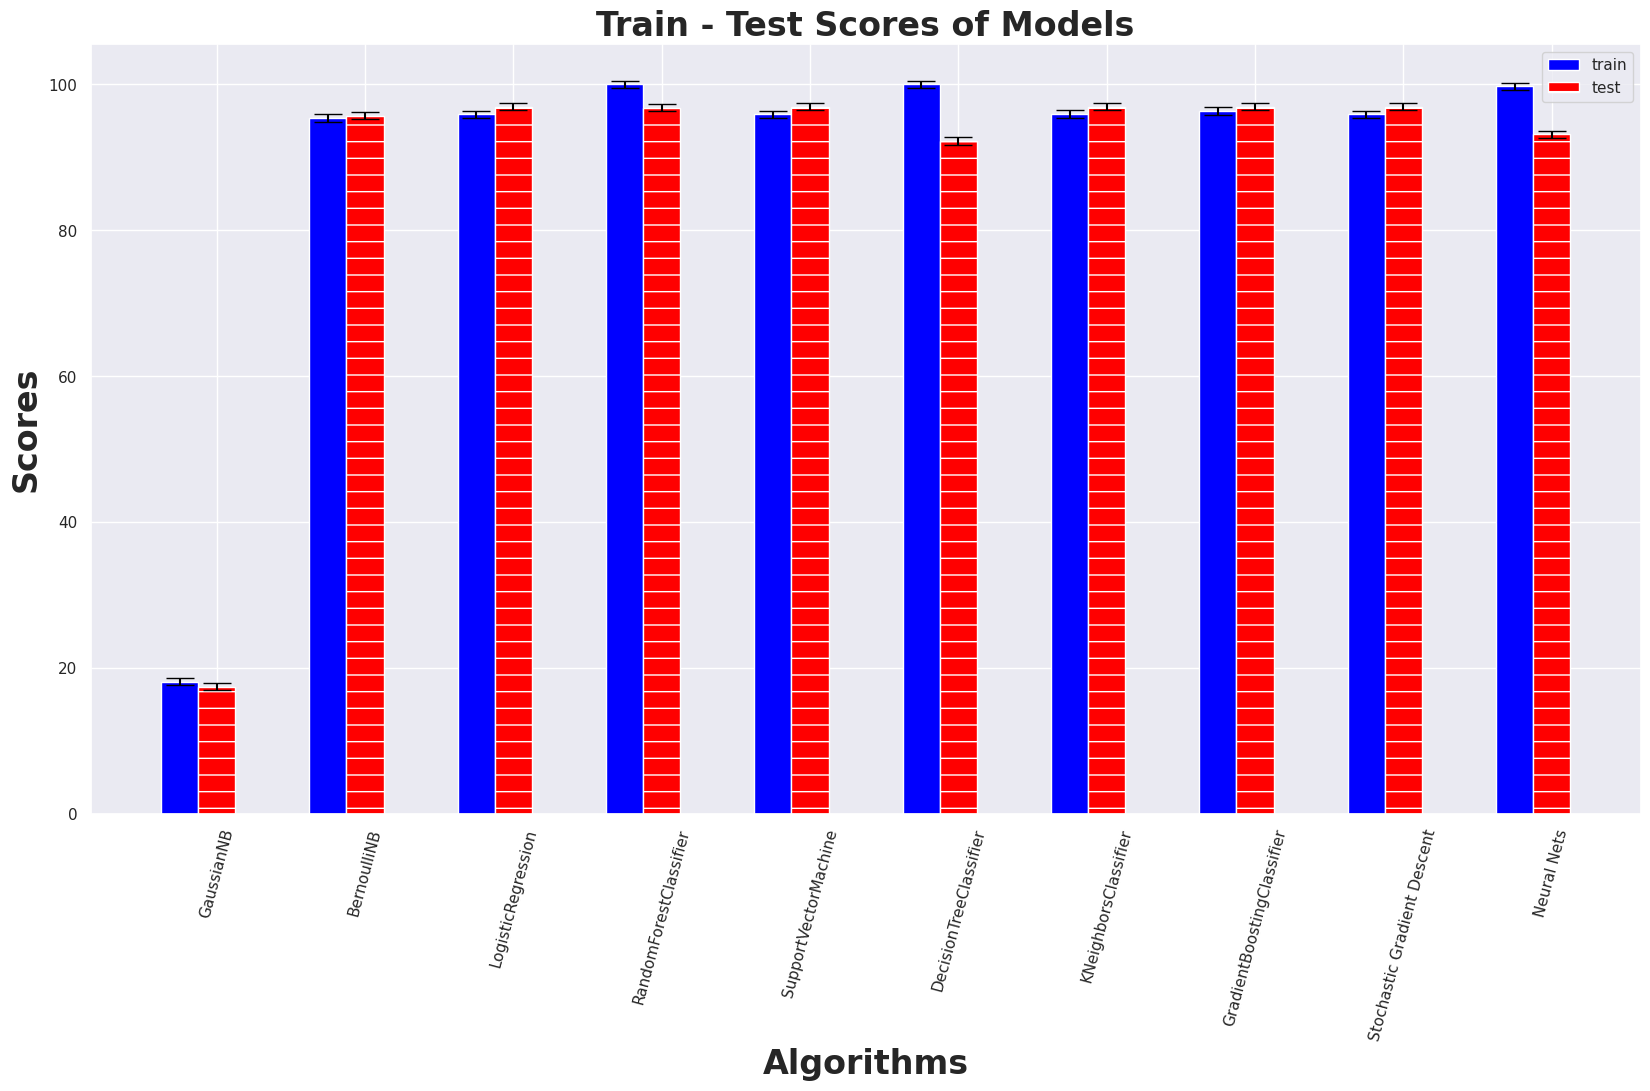

In [ ]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
# plt.title('Train - Validation - Test Scores of Models', fontweight='bold', size = 24)
plt.title('Train - Test Scores of Models', fontweight='bold', size = 24)

barWidth = 0.25
 
bars1 = trainScores
# bars2 = validationScores
bars3 = testScores
 
r1 = np.arange(len(bars1))
# r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r1]
 
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='train', yerr=0.5,ecolor="black",capsize=10)
# plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='validation', yerr=0.5,ecolor="black",capsize=10, alpha = .50)
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='test', yerr=0.5,ecolor="black",capsize=10, hatch = '-')
 
modelNames = ["GaussianNB", 'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']
    
plt.xlabel('Algorithms', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 75)
 
plt.legend()
plt.show()

In [ ]:
for i in range(10):
    print(f'Accuracy of {modelNames[i]} -----> {testScores[i]}')

Accuracy of GaussianNB -----> 17.477656405163852
Accuracy of BernoulliNB -----> 95.72989076464746
Accuracy of LogisticRegression -----> 96.92154915590864
Accuracy of RandomForestClassifier -----> 96.8222442899702
Accuracy of SupportVectorMachine -----> 96.92154915590864
Accuracy of DecisionTreeClassifier -----> 92.25422045680239
Accuracy of KNeighborsClassifier -----> 96.92154915590864
Accuracy of GradientBoostingClassifier -----> 96.92154915590864
Accuracy of Stochastic Gradient Descent -----> 96.92154915590864
Accuracy of Neural Nets -----> 93.14796425024826


The Highest is the "Accuracy of KNeighborsClassifier -----> 96.22641509433963"

10. Evaluation of Models

We evaluated these models according to their accuracies. Best algorithm is KNN with 96.03%. So, we will make k-Fold Cross Validation and Hyper-Parameter Optimization for KNN algorithm.

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

train_score = knn_model.score(X_train, y_train)
print(f'Train score of trained model: {train_score}')

# validation_score = knn_model.score(X_valid, y_valid)
# print(f'Validation score of trained model: {validation_score}')

test_score = knn_model.score(X_test, y_test)
print(f'Test score of trained model: {test_score}')

y_predictions = knn_model.predict(X_test)

conf_matrix = confusion_matrix(y_predictions, y_test)


print(f'Accuracy: {accuracy_score(y_predictions, y_test)*100}')
print()
print(f'Confussion matrix: \n{conf_matrix}\n')

Train score of trained model: 0.9595332671300894
Test score of trained model: 0.9682539682539683
Accuracy: 96.82539682539682

Confussion matrix: 
[[488  16]
 [  0   0]]



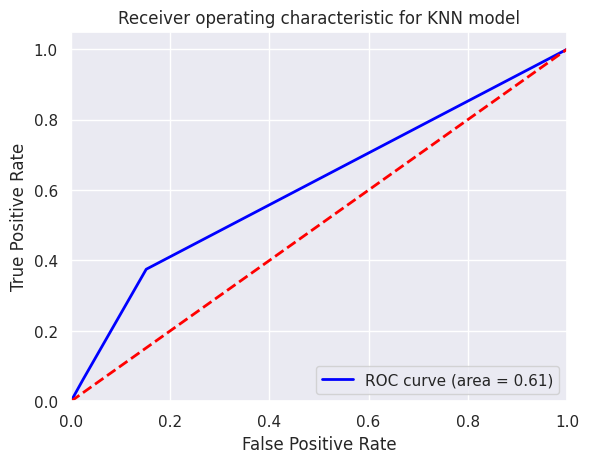

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# predict probabilities for the test set
y_probabilities = knn_model.predict_proba(X_test)[:,1]

# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for KNN model')
plt.legend(loc="lower right")
plt.show()


Best Features Selection


Feature Importance and Best Features

In [ ]:
 
features = ['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'gender_encoded_Female',
 'gender_encoded_Male',
 'gender_encoded_Other',
 'work_type_encoded_Govt_job',
 'work_type_encoded_Never_worked',
 'work_type_encoded_Private',
 'work_type_encoded_Self-employed',
 'work_type_encoded_children',
 'smoking_status_encoded_Unknown',
 'smoking_status_encoded_formerly smoked',
 'smoking_status_encoded_never smoked',
 'smoking_status_encoded_smokes']

label = ['stroke']

X = dataset[features]
y = dataset[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Total # of sample in whole dataset: 5035
Total # of sample in train dataset: 4028
Total # of sample in validation dataset: 503
Total # of sample in test dataset: 504


RandomForestClassifier
Old Shape: (5035, 19) New shape: (5035, 3)




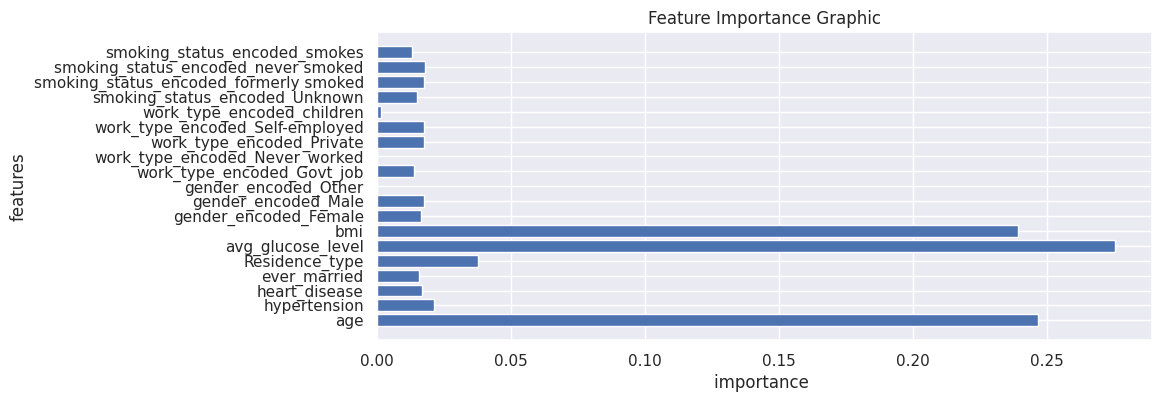

DecisionTreeClassifier
Old Shape: (5035, 19) New shape: (5035, 3)




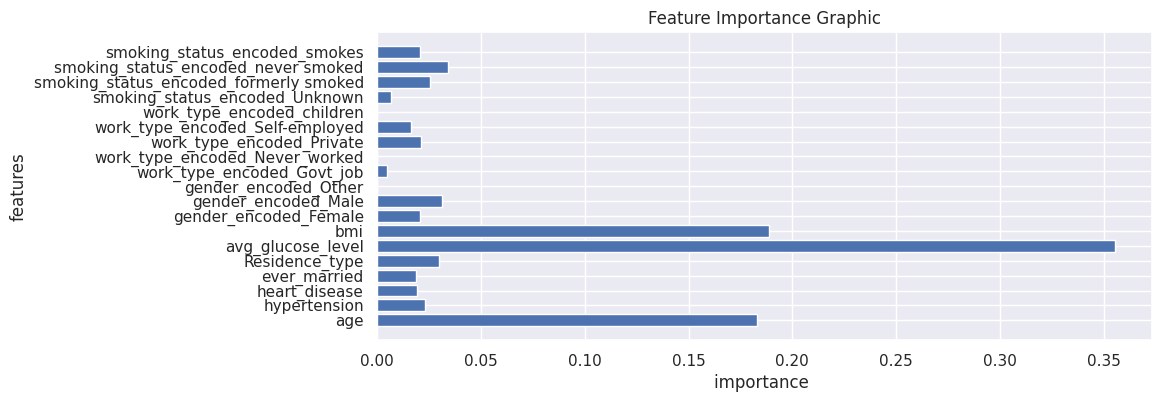

GradientBoostingClassifier
Old Shape: (5035, 19) New shape: (5035, 3)




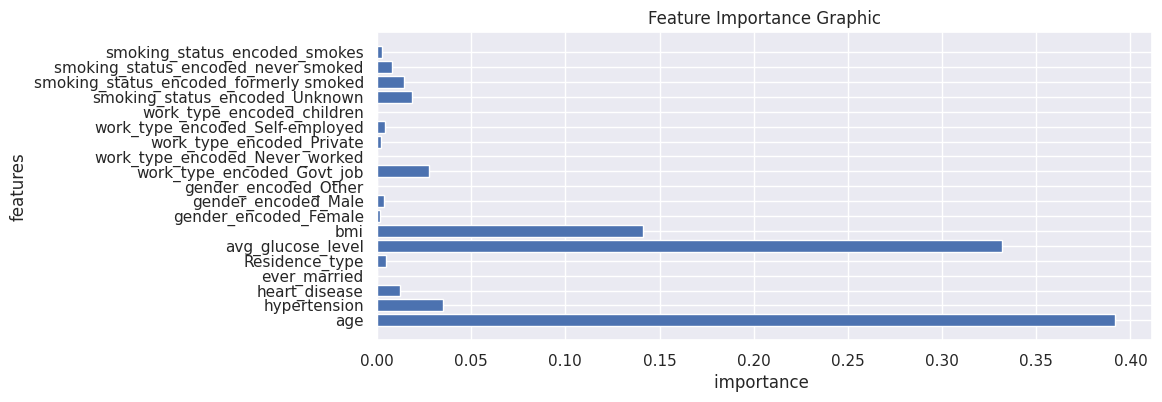

In [ ]:
models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
}

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  
  print(f'{m}') 
  best_features = SelectFromModel(model)
  best_features.fit(X, y)

  transformedX = best_features.transform(X)
  print(f"Old Shape: {X.shape} New shape: {transformedX.shape}")
  print("\n")

  imp_feature = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
  plt.figure(figsize=(10,4))
  plt.title("Feature Importance Graphic")
  plt.xlabel("importance ")
  plt.ylabel("features")
  plt.barh(imp_feature['Feature'],imp_feature['Importance'])
  plt.show()

In [ ]:
models = {
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'Stochastic Gradient Descent': SGDClassifier(max_iter=5000, random_state=0),
}

for m in models:
    model = models[m]
    model.fit(X_train, y_train)
    
    print(f'{m}')
    if hasattr(model, 'coef_'):
        best_features = SelectFromModel(model)
        best_features.fit(X, y)

        transformedX = best_features.transform(X)
        print(f"Old Shape: {X.shape} New shape: {transformedX.shape}")
        print("\n")
    else:
        print(f"Cannot apply SelectFromModel to {m}")


BernoulliNB
Cannot apply SelectFromModel to BernoulliNB
LogisticRegression
Old Shape: (5035, 19) New shape: (5035, 10)


Stochastic Gradient Descent
Old Shape: (5035, 19) New shape: (5035, 7)




Conclusion

In this notebook, We examined Stroke Prediction Dataset. We analyzed the dataset then, tested various ML algorithms for the one with best accuracy. We saved it for using with GUI for providing prediction to the user for chances of stroke to him; based on the data provided by him/her using GUI

In [ ]:
!jupyter nbconvert --to html Stroke_Prediction_Mostly_final_submission.ipynb 

[NbConvertApp] WARNING | pattern 'Stroke_Prediction_Mostly_final_submission.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.